In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def load_dataset(data_path):
    try:
        return pd.read_csv(data_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"The data you are looking for could not be find. Please double check the file name: {data_path}")

In [13]:
data = load_dataset("insurance.csv")
data.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [75]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
data.shape

(1338, 7)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### __The below cell is used to split data manually, so we are going to use scikit-learn for any inconvenience that could happen__

In [23]:
# def split_manually(data, test_ratio):
#     np.random.seed(42)
#     shuffled_indices = np.random.permutation(len(data))
#     test_data = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_data]
#     train_indices = shuffled_indices[test_data:]
#     return data.iloc[train_indices], data.iloc[test_indices]

# train_data, test_data = split_manually(data, 0.2)

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

In [30]:
print(f"The shape of the training set: {train_set.shape}")
print(f"The shape of the test set: {test_set.shape}")

The shape of the training set: (1070, 7)
The shape of the test set: (268, 7)


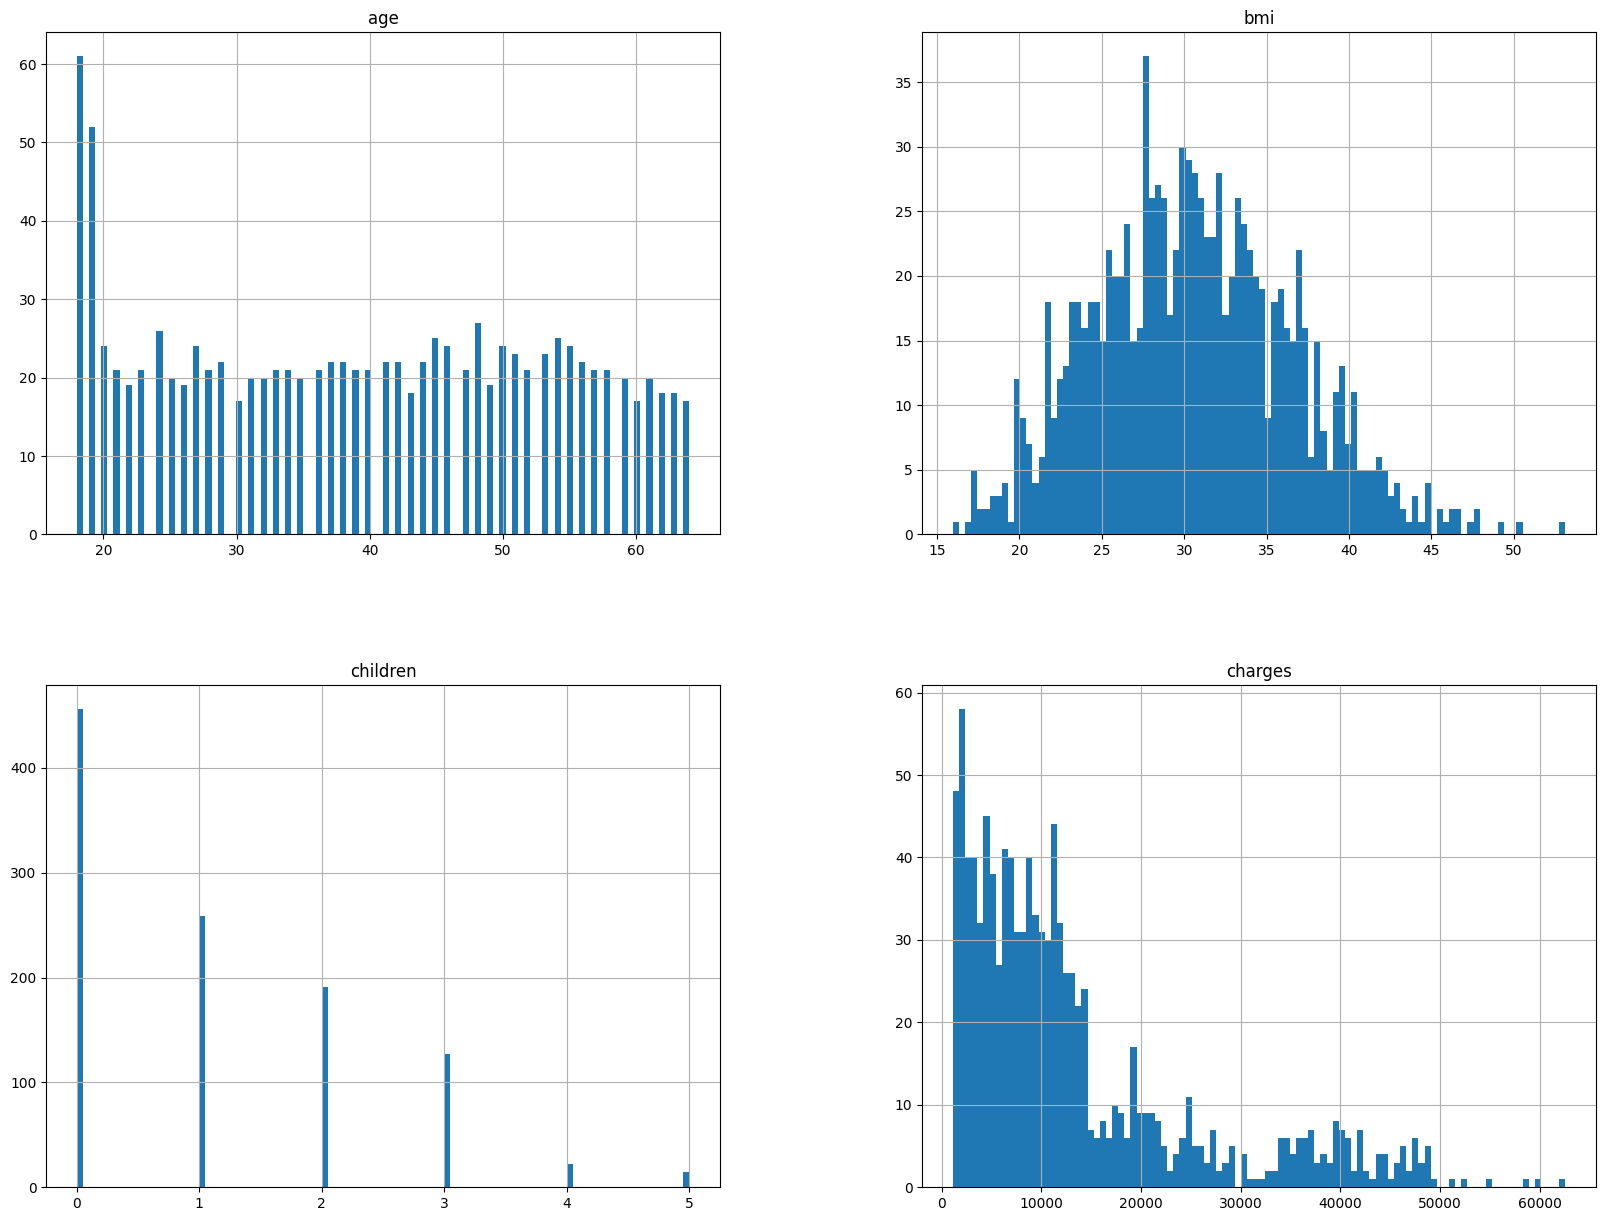

In [33]:
%matplotlib inline
train_set.hist(bins=100, figsize=(20,15))
plt.show()

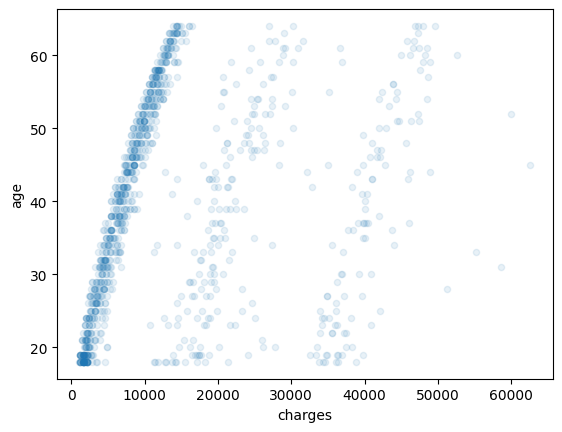

In [39]:
train_set.plot(kind='scatter', x='charges', y='age', alpha=0.1)
plt.show()

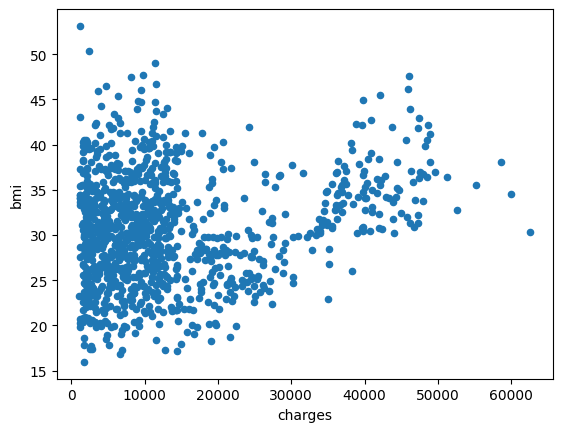

In [42]:
train_set.plot(kind='scatter', x='charges', y='bmi')
plt.show()

In [51]:
copied_train = train_set.copy()
copied_train = copied_train.drop(['sex', 'smoker', 'region'], axis=1)

corr_matrix = copied_train.corr()
corr_matrix['charges'].sort_values(ascending = False)

charges     1.000000
age         0.281721
bmi         0.197316
children    0.071885
Name: charges, dtype: float64

### __The below code shows how stupid I am. But we are good with our mistakes. So I am not gonna remove that__

In [54]:
copied_train['Cpbmi'] = copied_train['charges']/copied_train['bmi']
corr = copied_train.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
Cpbmi       0.961546
age         0.281721
bmi         0.197316
children    0.071885
Name: charges, dtype: float64

In [62]:
train_data = train_set.drop('charges', axis=1)
train_labels = train_set['charges']
train_data

age     sex     bmi  children smoker     region
560    46  female  19.950         2     no  northwest
1285   47  female  24.320         0     no  northeast
1142   52  female  24.860         0     no  southeast
969    39  female  34.320         5     no  southeast
486    54  female  21.470         3     no  northwest
...   ...     ...     ...       ...    ...        ...
1095   18  female  31.350         4     no  northeast
1130   39  female  23.870         5     no  southeast
1294   58    male  25.175         0     no  northeast
860    37  female  47.600         2    yes  southwest
1126   55    male  29.900         0     no  southwest

[1070 rows x 6 columns]

In [70]:
cat_attrs = ['sex', 'smoker', 'region']
num_attrs = ['age', 'bmi', 'children']

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('stdscaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs)
])

data_prepared = full_pipeline.fit_transform(train_data)

In [77]:
#It's just for showing that the pipeline works just right, we are not going to use data_to_pd, instead we are going to use data_prepared
data_to_pd = pd.DataFrame(data_prepared)
data_to_pd

0         1         2    3    4    5    6    7    8    9    10
0     0.472227 -1.756525  0.734336  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0
1     0.543313 -1.033082 -0.911192  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0
2     0.898745 -0.943687 -0.911192  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
3    -0.025379  0.622393  3.202629  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
4     1.040918 -1.504893  1.557100  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...
1065 -1.518194  0.130717  2.379865  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0
1066 -0.025379 -1.107579  3.202629  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
1067  1.325264 -0.891539 -0.911192  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0
1068 -0.167551  2.820864  0.734336  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
1069  1.112004 -0.109327 -0.911192  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0

[1070 rows x 11 columns]

In [79]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(data_prepared, train_labels)

LinearRegression()

In [81]:
some_data = data.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f"Predictions: {reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Predictions: [25197.53106142  3826.78192926  6987.53528962  3813.39661623
  5637.96741868]
Labels: [9193.8385, 8534.6718, 27117.99378, 8596.8278, 12475.3513]


In [84]:
from sklearn.metrics import mean_squared_error

predictions = reg.predict(data_prepared)
mse = mean_squared_error(train_labels, predictions)
rmse = np.sqrt(mse)
print(rmse)

6105.545160099847


In [107]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, train_labels)
preds = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(train_labels, preds)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

494.20598375812835


In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, train_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Std:", scores.std())
display_scores(tree_scores)

Scores: [6105.00651178 6428.11446774 6884.53238832 7229.48904282 7051.46614064
 6458.76436823 7298.30385626 7322.28898385 6913.56237422 5136.57373617]
Mean: 6682.810187002504
Std: 644.6890473526588


In [106]:
lin_scores = cross_val_score(reg, data_prepared, train_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-lin_scores)
display_scores(lin_reg_scores)

Scores: [6073.99997254 6580.87166754 5236.96899608 6045.25239632 5836.4647871
 6127.43525895 7281.08373608 6321.52706355 6193.3145481  5637.06299714]
Mean: 6133.398142340222
Std: 520.1762993156614


In [108]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(data_prepared, train_labels)
rf_scores = cross_val_score(random_forest, data_prepared, train_labels,
                           scoring='neg_mean_squared_error', cv=10)
ranf_scores = np.sqrt(-rf_scores)
display_scores(ranf_scores)

Scores: [4832.55783765 5177.52202578 4001.61708007 4530.17145949 5261.45982419
 4914.37570287 5581.73995815 5377.82606474 5163.87609979 4691.53956358]
Mean: 4953.268561632401
Std: 439.782887035117


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5,15,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators':[10,20], 'max_features': [2,5]}
]
ran_forest = RandomForestRegressor()
grid_search = GridSearchCV(ran_forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(data_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [5, 15, 30]},
                         {'bootstrap': [False], 'max_features': [2, 5],
                          'n_estimators': [10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [111]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [113]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [115]:
final_model = grid_search.best_estimator_

test_prepared = test_set.drop('charges', axis=1)
test_labels = test_set['charges']
X_test_prepared = full_pipeline.transform(test_prepared)
final_preds = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(test_labels, final_preds)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

4658.577340714551
